In [87]:
    # 1. dataset <- transaction.csv, dan tampilkan
    import pandas as pd

    dataset = pd.read_csv('transaction.csv')
    dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [88]:
# 2. data <- ambillah data pada dataset untuk fitur Qty, Country (“Germany”), month, year (“2011”)
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Year'] = dataset['InvoiceDate'].dt.year

# Filter data for 'Country' == 'Germany' and 'Year' == 2011, selecting only relevant columns
data = dataset[(dataset['Country'] == 'Germany') & (dataset['Year'] == 2011)][['Qty', 'Country', 'Month', 'Year']]
data.head()

,Qty,Country,Month,Year
1185,628,Germany,5,2011
1186,981,Germany,5,2011
1187,212,Germany,5,2011
1188,910,Germany,5,2011
1189,668,Germany,5,2011


In [89]:
#3. TotalQty <- ambillah month dari data dan akumulasi Qty pada bulan yang sama, dan tampilkan
totalQty = data.groupby('Month')['Qty'].sum().reset_index()
totalQty.columns = ['Month', 'TotalQty']
totalQty.head()

,Month,TotalQty
0,1,101266
1,2,37800
2,3,72084
3,4,60993
4,5,103749


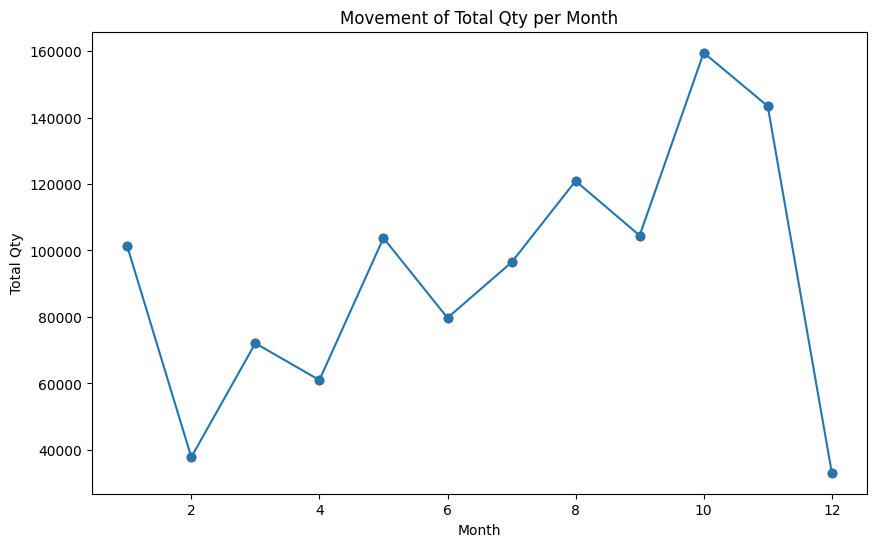

In [90]:
#4. Visualisasikan pergerakan nilai totalQty dimana sumbu x=month dan sumbu y=total Qty
# Importing necessary libraries for visualization
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Plotting the movement of TotalQty with Month as the x-axis and TotalQty as the y-axis
plt.figure(figsize=(10, 6))
plt.plot(totalQty['Month'], totalQty['TotalQty'], marker='o', linestyle='-')
plt.scatter(totalQty['Month'], totalQty['TotalQty'], color='red')  # Highlighting data points

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Total Qty')
plt.title('Movement of Total Qty per Month')

# Displaying the plot
plt.show()



In [ ]:
# 5. PredictedQty <- prediksikan total Qty dari TotalQty pada bulan Januari 2012 dengan Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing data for linear regression: Month as X and TotalQty as y
X = totalQty[['Month']].values  # Reshape month data for model input
y = totalQty['TotalQty'].values  # TotalQty as the target variable

linreg = LinearRegression()
linreg.fit(X, y)

# Predicting TotalQty for January 2012 (Month = 13)
# predicted_month = np.array([[13]])
predicted_qty = linreg.predict([[13]])

print("Predictive Mining dengan Linear Regression", predicted_qty[0])

Predictive Mining dengan Linear Regression 117751.75757575757
